# Librairies

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
import contextily as cx

# Load data

In [2]:
df = gpd.read_file('raw/intenzita_dopravy_pentlogramy_-2087072355465349330.geojson')

(16.435375213623047, 16.786829005695107, 49.09557099992234, 49.32523387394962)

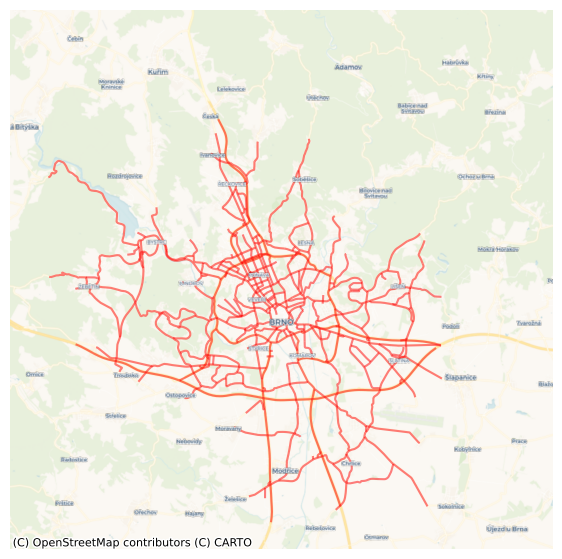

In [3]:
# Plot sensors
ax = df.plot(color = 'r', alpha = .5, figsize = (7,7))
# Add context in backround
cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = df.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('auto')
plt.axis('off')

In [4]:
df.columns

Index(['id', 'car_2010', 'truc_2010', 'car_2011', 'truc_2011', 'car_2012',
       'truc_2012', 'car_2013', 'truc_2013', 'car_2014', 'truc_2014',
       'car_2015', 'truc_2015', 'car_2016', 'truc_2016', 'car_2017',
       'truc_2017', 'car_2018', 'truc_2018', 'car_2019', 'truc_2019',
       'car_2020', 'truc_2020', 'car_2021', 'truc_2021', 'car_2022',
       'truc_2022', 'car_2023', 'truc_2023', 'datum_exportu', 'ObjectId',
       'GlobalID', 'geometry'],
      dtype='object')

In [5]:
# Remove earlier years
df = df.drop(
    ['car_2010', 'truc_2010', 'car_2011', 'truc_2011', 'car_2012',
       'truc_2012', 'car_2013', 'truc_2013', 'car_2014', 'truc_2014',
       'car_2015', 'truc_2015',], axis = 1
)

In [6]:
# The number is in thousands
for c in df.columns :
    if 'car' in c :
        df[c] = 1e3 * df[c]

# Map matching with OSM

In [7]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [ ]:
df = lines_matching(df)

# Final save

In [12]:
for year in range(2016, 2024):
    sub = df[[
        f'car_{year}',
        f'truc_{year}',
        'osm_name', 'osm_type', 'osm_lanes',  'osm_oneway', 'osmid', 'geometry'
    ]].rename(
        columns = {
          f'car_{year}':'AADT',
        f'truc_{year}':'TR_pct_AADT',  
        }
    )
    
    sub.to_file(
        f'treated/Brno_AADT_{year}.geojson'
    )